In [1]:
import numpy as np
from sklearn.datasets import load_iris
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.svm import LinearSVC 
import pandas as pd

In [26]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
mall_customer=pd.read_csv('F:/project_data_ science/Mall_Customers.csv')

In [3]:
mall_customer

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [11]:
mall_customer.shape

(200, 5)

In [12]:
mall_customer.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [13]:
mall_customer.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


<Figure size 1152x1296 with 0 Axes>

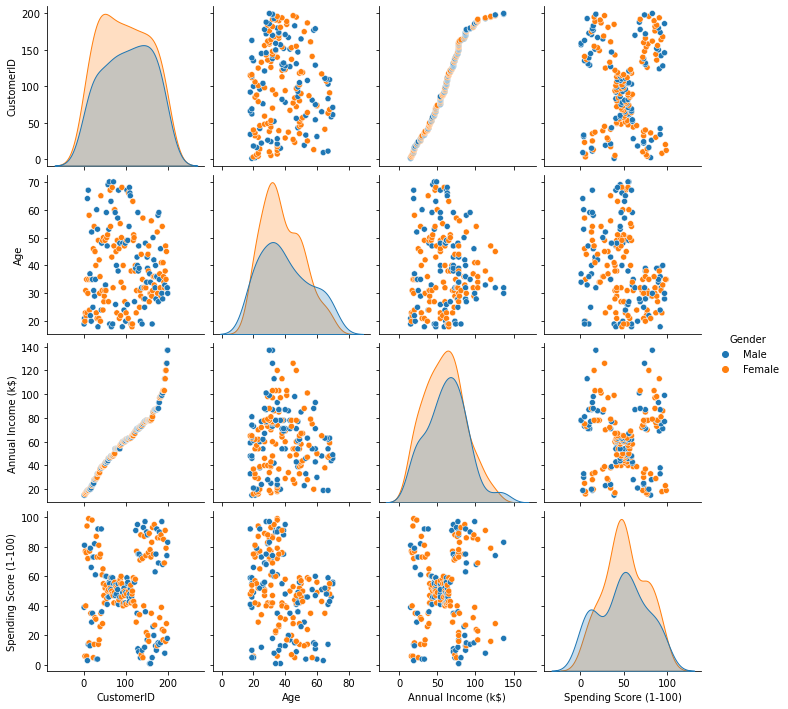

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(1,figsize=(16,18))
sns.pairplot(data=mall_customer,hue='Gender')

<AxesSubplot:xlabel='Gender', ylabel='count'>

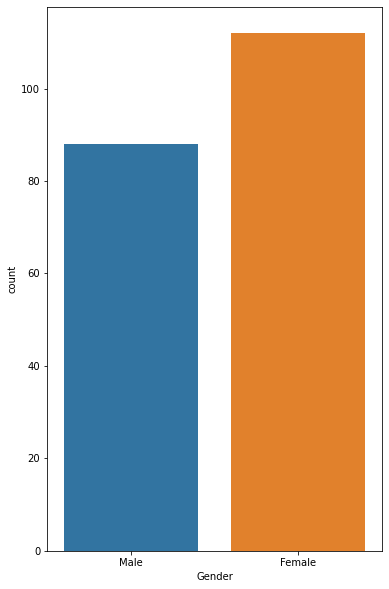

In [17]:
plt.figure(1,figsize=(6,10))
sns.countplot(x='Gender',data=mall_customer)

In [18]:
mall_customer['Gender']=mall_customer['Gender'].map({'Male':0,'Female':1})

In [19]:
mall_customer.head(3)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6


In [20]:
df=mall_customer.copy()

C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexib

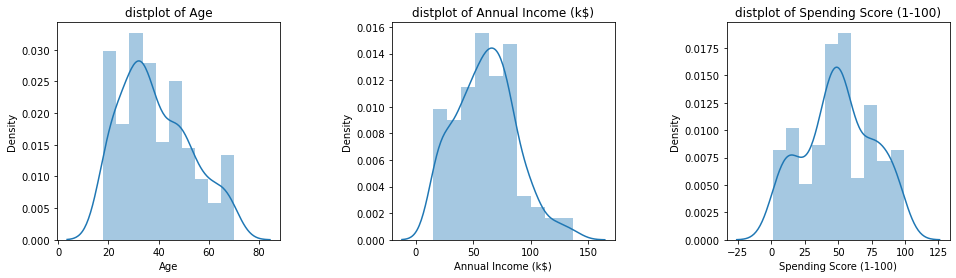

In [21]:
plt.figure(1,figsize=(16,4))
n=0
for x in ['Age','Annual Income (k$)','Spending Score (1-100)']:
    n+=1
    plt.subplot(1,3,n)
    plt.subplots_adjust(hspace=0.5,wspace=0.5)
    sns.distplot(df[x],bins=10)
    plt.title('distplot of {}'.format(x))

In [25]:
x=df.iloc[:,-4:]
x

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40
...,...,...,...,...
195,1,35,120,79
196,1,45,126,28
197,0,32,126,74
198,0,32,137,18


In [38]:
km_inertias,km_scores=[],[]
for k in range(3,10):
    km=KMeans(n_clusters=k).fit(x)
    km_inertias.append(km.inertia_)
    km_scores.append(silhouette_score(x,km.labels_))
    print (" processing kmeans with k ={},inertias {}, silh_score {}".format(k,km.inertia_,silhouette_score(x,km.labels_)))

 processing kmeans with k =3,inertias 143391.5923603568, silh_score 0.383798873822341
 processing kmeans with k =4,inertias 104414.67534220166, silh_score 0.4052954330641215
 processing kmeans with k =5,inertias 75399.61541401484, silh_score 0.4440669204743008
 processing kmeans with k =6,inertias 58348.64136331505, silh_score 0.45205475380756527
 processing kmeans with k =7,inertias 51167.246629574794, silh_score 0.43943815351205556
 processing kmeans with k =8,inertias 44359.63464114833, silh_score 0.4294563708430266
 processing kmeans with k =9,inertias 40948.7929507992, silh_score 0.41764424180554754


Text(0.5, 1.0, 'find the value of k')

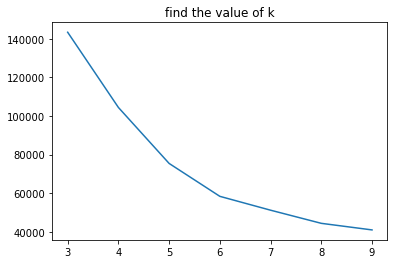

In [40]:
sns.lineplot(range(3,10),km_inertias)
plt.title('find the value of k')

C:\Users\ASUS\.conda\envs\py3-TF2.0\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 1.0, 'find the value of k')

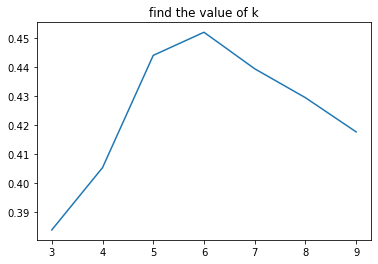

In [41]:
sns.lineplot(range(3,10),km_scores)
plt.title('find the value of k')

In [42]:
km=KMeans(n_clusters=6).fit(x)

In [44]:
x['label']=km.labels_

In [45]:
x

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,0
197,0,32,126,74,1
198,0,32,137,18,0


In [46]:
x['label'].unique()

array([4, 3, 5, 2, 1, 0])

In [48]:
x.label.value_counts()

5    44
1    39
2    38
0    35
4    22
3    22
Name: label, dtype: int64

In [49]:
x.columns

Index(['Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)',
       'label'],
      dtype='object')

In [55]:
pivot=x.pivot_table(values=['Age', 'Annual Income (k$)', 'Spending Score (1-100)'],index=['label'],aggfunc=np.mean)

In [56]:
pivot

,Age,Annual Income (k$),Spending Score (1-100)
label,,,
0,41.685714,88.228571,17.285714
1,32.692308,86.538462,82.128205
2,27.000000,56.657895,49.131579
3,25.272727,25.727273,79.363636
4,44.318182,25.772727,20.272727
5,56.340909,53.704545,49.386364


In [57]:
x

,Gender,Age,Annual Income (k$),Spending Score (1-100),label
0,0,19,15,39,4
1,0,21,15,81,3
2,1,20,16,6,4
3,1,23,16,77,3
4,1,31,17,40,4
...,...,...,...,...,...
195,1,35,120,79,1
196,1,45,126,28,0
197,0,32,126,74,1
198,0,32,137,18,0


C:\Users\ASUS\AppData\Local\Temp/ipykernel_1188/344233490.py:3: MatplotlibDeprecationWarning: Axes3D(fig) adding itself to the figure is deprecated since 3.4. Pass the keyword argument auto_add_to_figure=False and use fig.add_axes(ax) to suppress this warning. The default value of auto_add_to_figure will change to False in mpl3.5 and True values will no longer work in 3.6.  This is consistent with other Axes classes.
  ax=Axes3D(fig)


Text(0.5, 0, 'spending score')

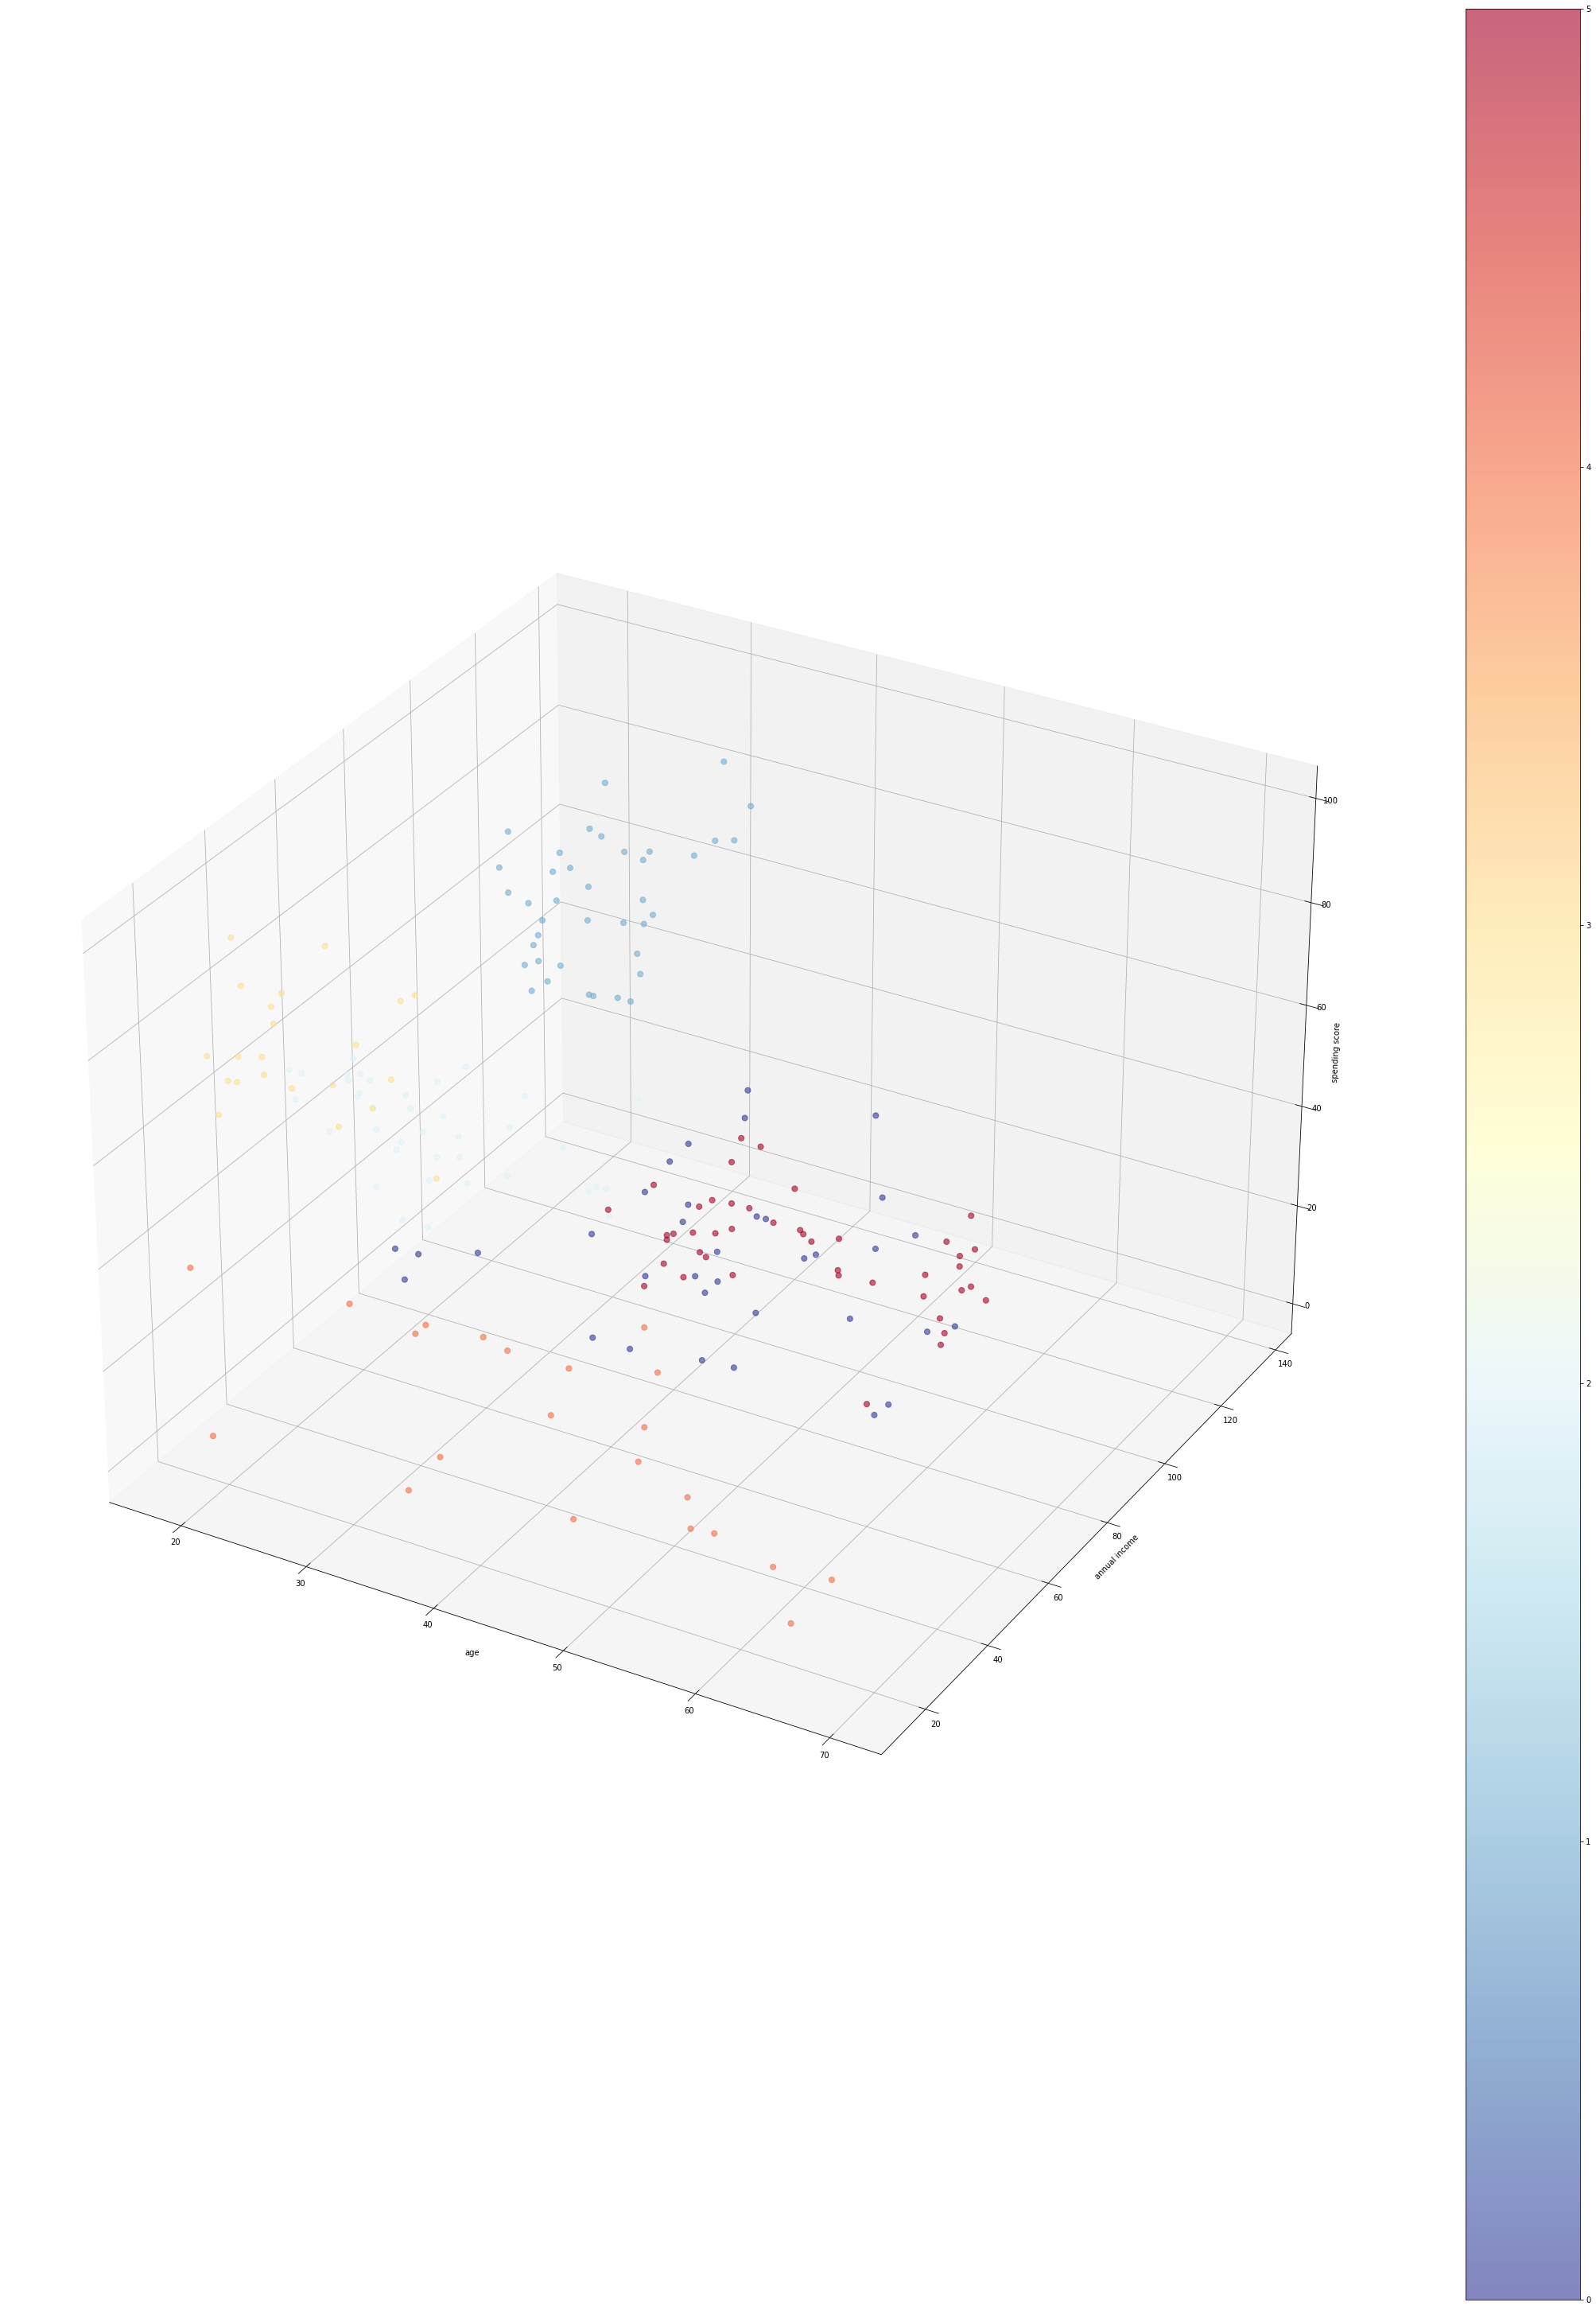

In [73]:
from mpl_toolkits.mplot3d import Axes3D
fig=plt.figure(1,figsize=(30,40))
ax=Axes3D(fig)
xs=x.Age
yx=x['Annual Income (k$)']
zx=x['Spending Score (1-100)']
im=ax.scatter(xs,yx,zx,s=50,alpha=0.6,c=km.labels_,cmap='RdYlBu_r')
fig.colorbar(im,ax=ax)
ax.set_xlabel('age')
ax.set_ylabel('annual income')
ax.set_zlabel('spending score')

In [75]:
for k in range(6):
    print( f'cluster nb: (k)')
    print (x[x.label==k].describe().iloc[:,1:-1])
    print('\n\n')

cluster nb: (k)
             Age  Annual Income (k$)  Spending Score (1-100)
count  35.000000           35.000000               35.000000
mean   41.685714           88.228571               17.285714
std    10.897305           16.367266               10.211215
min    19.000000           71.000000                1.000000
25%    35.000000           77.500000               10.000000
50%    43.000000           85.000000               16.000000
75%    47.500000           97.500000               23.500000
max    59.000000          137.000000               39.000000



cluster nb: (k)
             Age  Annual Income (k$)  Spending Score (1-100)
count  39.000000           39.000000               39.000000
mean   32.692308           86.538462               82.128205
std     3.728650           16.312485                9.364489
min    27.000000           69.000000               63.000000
25%    30.000000           75.500000               74.500000
50%    32.000000           79.000000              